In [1]:
import sqlite3
import pandas as pd
import matplotlib as rc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#------------------------------------------------------------------------------
# accept a dataframe, remove outliers, return cleaned data in a new dataframe
# see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
#------------------------------------------------------------------------------
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

# set style for seaborn
sns.set_style("whitegrid")
sns.set_context("paper")
WIDTH = 5.8
SMALL_HEIGHT = 3
MEDIUM_HEIGHT = 5
BIGGER_HEIGHT = 7

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

OUTPUT = "../output/graph/"

N_LEVELS = 10

In [2]:
# connect to database
connection = sqlite3.connect("../output/db/bulk_analysis_2019-11-08_1000ms.db")


In [3]:
# load games and moves into dataframes 
df_game_dirty = pd.read_sql("SELECT * FROM game", connection)
df_move_dirty = pd.read_sql("SELECT * FROM move", connection)

# remove games that are either too short or too long
df_game = remove_outlier(df_game_dirty, "length")
df_move = df_move_dirty.query("ply_number <= 133")
df_move.head()


,id,fullmove_number,ply_number,turn,san,lan,score,score_change,score_change_category,move_count,...,guarded_pieces_centipawn_all,attacked_guarded_pieces_centipawn_all,unopposed_threats_centipawn_all,threats_centipawn_all,attack_defense_relation1,attack_defense_relation2,material,pawn_ending,rook_ending,game_id
0,1,1,1,1,d4,d2-d4,-10,10,0.20,20,...,5800,0,0,0,0,-600,0,0,0,1
1,2,1,2,0,g6,g7-g6,118,128,2.56,20,...,5800,0,0,0,0,-500,0,0,0,1
2,3,2,3,1,c4,c2-c4,37,81,1.62,28,...,5700,0,0,0,0,-1500,0,0,0,1
3,4,2,4,0,Bg7,Bf8-g7,106,69,1.38,21,...,5900,100,0,0,600,-2100,0,0,0,1
4,5,3,5,1,Nf3,Ng1-f3,43,63,1.26,30,...,5900,100,0,0,900,-1300,0,0,0,1


In [4]:
df_move[["best_move_score_diff"]].describe()

,best_move_score_diff
count,62009.000000
mean,171.856472
std,666.428816
min,0.000000
25%,8.000000
50%,25.000000
75%,90.000000
max,15320.000000


In [5]:
df_move_mistake_clean = remove_outlier(df_move, "best_move_score_diff")
df_move_mistake_clean[["best_move_score_diff"]].describe()


,best_move_score_diff
count,53805.000000
mean,37.852727
std,46.399117
min,0.000000
25%,6.000000
50%,19.000000
75%,52.000000
max,212.000000


Text(0.5, 0, 'centipawn')

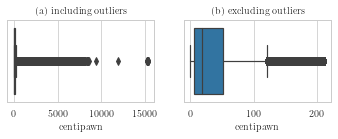

In [6]:
# Best move score difference
f, axes = plt.subplots(1, 2, figsize=(WIDTH, 1.5))
box_dirty = sns.boxplot(x=df_move["best_move_score_diff"], ax=axes[0])
axes[0].set_title("(a) including outliers")
axes[0].set_xlabel("centipawn")
box_clean = sns.boxplot(x=df_move_mistake_clean["best_move_score_diff"], ax=axes[1])
axes[1].set_title("(b) excluding outliers")
axes[1].set_xlabel("centipawn")


In [7]:
f.tight_layout()
f.savefig(OUTPUT+"boxplot_mistakes.pdf")


df_move_2040_dirty = df_move[df_move["game_id"].isin(df_game.query('length >= 20 & length <= 40')["id"])]
df_move_2040 = remove_outlier(df_move_2040_dirty, "best_move_score_diff")[["ply_number", "best_move_score_diff"]]
df_move_4060_dirty = df_move[df_move["game_id"].isin(df_game.query('length >= 40 & length <= 60')["id"])]
df_move_4060 = remove_outlier(df_move_4060_dirty, "best_move_score_diff")[["ply_number", "best_move_score_diff"]]
df_move_6080_dirty = df_move[df_move["game_id"].isin(df_game.query('length >= 60 & length <= 80')["id"])]
df_move_6080 = remove_outlier(df_move_6080_dirty, "best_move_score_diff")[["ply_number", "best_move_score_diff"]]
df_move_80100_dirty = df_move[df_move["game_id"].isin(df_game.query('length >= 80 & length <= 100')["id"])]
df_move_80100 = remove_outlier(df_move_80100_dirty, "best_move_score_diff")[["ply_number", "best_move_score_diff"]]
df_move_100120_dirty = df_move[df_move["game_id"].isin(df_game.query('length >= 100 & length <= 120')["id"])]
df_move_100120 = remove_outlier(df_move_100120_dirty, "best_move_score_diff")[["ply_number", "best_move_score_diff"]]


c:\users\stefan\pycharmprojects\chess_analytics\venv\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


Text(0.5, 0, 'ply')

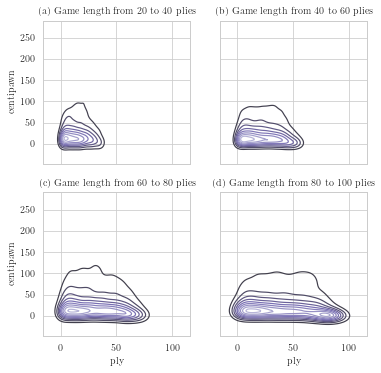

In [8]:
# Kernel density for mistakes in games with varying length
f2, axes = plt.subplots(2, 2, figsize=(WIDTH, WIDTH), sharex=True, sharey=True)
sns.kdeplot(data=df_move_2040, n_levels=N_LEVELS, cmap="Purples_d", ax=axes[0][0])
axes[0][0].set_title("(a) Game length from 20 to 40 plies")
#axes[0][0].set_xlabel("ply")
axes[0][0].set_ylabel("centipawn")
sns.kdeplot(data=df_move_4060, n_levels=N_LEVELS, cmap="Purples_d", ax=axes[0][1])
axes[0][1].set_title("(b) Game length from 40 to 60 plies")
#axes[0][1].set_xlabel("ply")
#axes[0][1].set_ylabel("centipawn")
sns.kdeplot(data=df_move_6080, n_levels=N_LEVELS, cmap="Purples_d", ax=axes[1][0])
axes[1][0].set_title("(c) Game length from 60 to 80 plies")
axes[1][0].set_xlabel("ply")
axes[1][0].set_ylabel("centipawn")
sns.kdeplot(data=df_move_80100, n_levels=N_LEVELS, cmap="Purples_d", ax=axes[1][1])
axes[1][1].set_title("(d) Game length from 80 to 100 plies")
axes[1][1].set_xlabel("ply")
#axes[1][1].set_ylabel("centipawn")


In [9]:
f2.tight_layout()
f2.savefig(OUTPUT+"kde_mistakelengths.pdf")


In [10]:
df_move_80100_normal_dirty = df_move[df_move["game_id"].isin(df_game.query('length >= 80 & length <= 100')["id"])].query('best_move_score_diff < 50')
df_move_80100_normal = remove_outlier(df_move_80100_normal_dirty, "best_move_score_diff")[["ply_number", "best_move_score_diff"]]
df_move_80100_inacc_dirty = df_move[df_move["game_id"].isin(df_game.query('length >= 80 & length <= 100')["id"])].query('best_move_score_diff >= 50 & best_move_score_diff < 100')
df_move_80100_inacc = remove_outlier(df_move_80100_inacc_dirty, "best_move_score_diff")[["ply_number", "best_move_score_diff"]]
df_move_80100_mistake_dirty = df_move[df_move["game_id"].isin(df_game.query('length >= 80 & length <= 100')["id"])].query('best_move_score_diff >= 100 & best_move_score_diff < 300')
df_move_80100_mistake = remove_outlier(df_move_80100_mistake_dirty, "best_move_score_diff")[["ply_number", "best_move_score_diff"]]
df_move_80100_blunder_dirty = df_move[df_move["game_id"].isin(df_game.query('length >= 80 & length <= 100')["id"])].query('best_move_score_diff >= 300')
df_move_80100_blunder = remove_outlier(df_move_80100_blunder_dirty, "best_move_score_diff")[["ply_number", "best_move_score_diff"]]


Text(0.5, 0, 'ply')

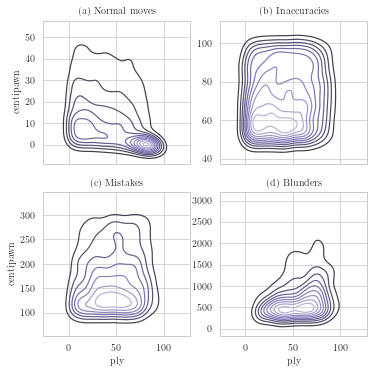

In [11]:
# Kernel densities for different move categories in games with length 80--100.
f, axes = plt.subplots(2, 2, figsize=(WIDTH, WIDTH), sharex=True)
sns.kdeplot(df_move_80100_normal, n_levels=N_LEVELS, cmap="Purples_d", ax=axes[0][0])
axes[0][0].set_title("(a) Normal moves")
#axes[0][0].set_xlabel("ply")
axes[0][0].set_ylabel("centipawn")
sns.kdeplot(df_move_80100_inacc, n_levels=N_LEVELS, cmap="Purples_d", ax=axes[0][1])
axes[0][1].set_title("(b) Inaccuracies")
#axes[0][1].set_xlabel("ply")
#axes[0][1].set_ylabel("centipawn")
sns.kdeplot(df_move_80100_mistake, n_levels=N_LEVELS, cmap="Purples_d", ax=axes[1][0])
axes[1][0].set_title("(c) Mistakes")
axes[1][0].set_xlabel("ply")
axes[1][0].set_ylabel("centipawn")
sns.kdeplot(df_move_80100_blunder, n_levels=N_LEVELS, cmap="Purples_d", ax=axes[1][1])
axes[1][1].set_title("(d) Blunders")
axes[1][1].set_xlabel("ply")
#axes[1][1].set_ylabel("centipawn")
#f.suptitle("Kernel densities for different move categories in games with length 80--100.")
#f.subplots_adjust(top=0.88)

In [12]:
f.tight_layout()
f.savefig(OUTPUT+"kde_mistakedist80100.pdf")

Text(0.5, 0, 'centipawn')

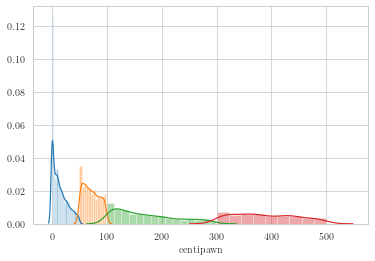

In [13]:

sns.distplot(df_move_80100_normal["best_move_score_diff"])
sns.distplot(df_move_80100_inacc["best_move_score_diff"])
sns.distplot(df_move_80100_mistake["best_move_score_diff"])
df_move_80100_blunder_cut = df_move_80100_blunder.query('best_move_score_diff < 500')
dist_mistakes = sns.distplot(df_move_80100_blunder_cut["best_move_score_diff"])
dist_mistakes.set_xlabel("centipawn")